## Cilia quantification
The purpose of this notebook is to implement scikit image regionprops to populate a table with the characteristics of each segmented cilia.

In [7]:
from morphocilia.io import load_rescaled_channel
from morphocilia.segmenter import cilia_segmenter_cleaner
import napari
import numpy as np
import pandas as pd
from skimage.measure import regionprops_table
import seaborn as sns

c:\Users\Lab\.conda\envs\cilia\Lib\site-packages\napari\plugins\_plugin_manager.py:555: UserWarning: Plugin 'napari_skimage_regionprops2' has already registered a function widget 'duplicate current frame' which has now been overwritten
  warn(message=warn_message)


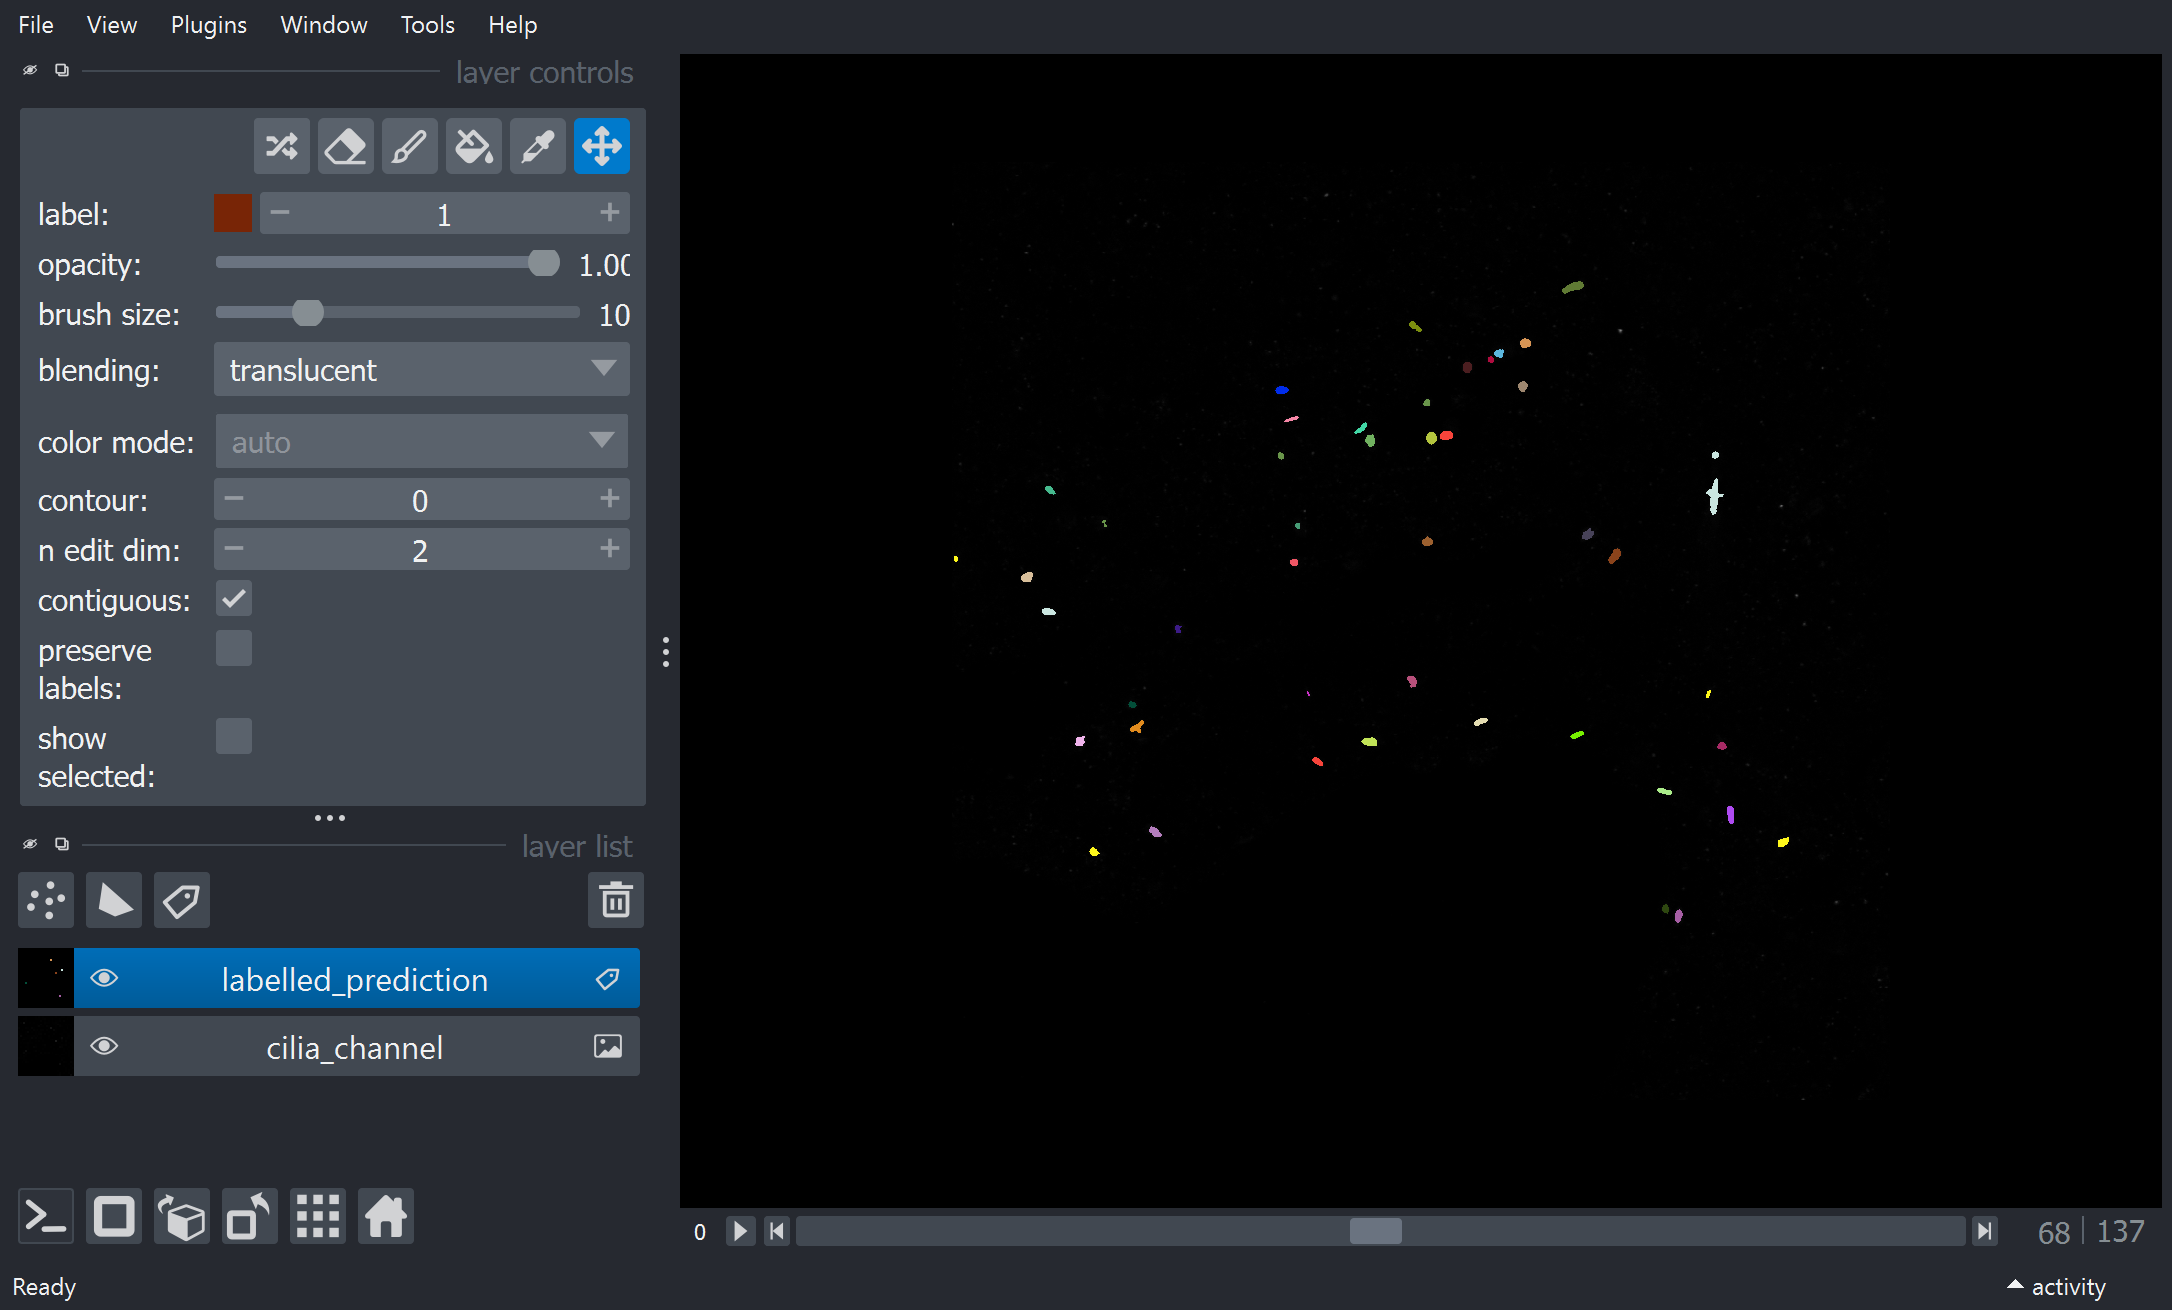

In [6]:
cilia_channel = load_rescaled_channel(
    "../data/20231025_p1_cd13_opn_arl13b.lif", 5, 1
)

labelled_prediction = cilia_segmenter_cleaner(cilia_channel)

viewer = napari.Viewer()
viewer.add_image(cilia_channel)
viewer.add_labels(labelled_prediction, opacity=1)
napari.utils.nbscreenshot(viewer)

In [3]:
def intensity_median(mask, intensity_image):
    return np.median(intensity_image[mask])

In [4]:
props = regionprops_table(
    labelled_prediction,
    cilia_channel.compute(),
    properties=[
        "label",
        "area",
        "axis_major_length",
        "axis_minor_length",
        "intensity_max",
        "solidity",
    ],
    extra_properties=[intensity_median],
)
data = pd.DataFrame(props)
data

,label,area,axis_major_length,axis_minor_length,intensity_max,solidity,intensity_median
0,1,718.0,18.296708,8.520985,174.0,0.896380,12.0
1,2,831.0,21.076076,8.039397,126.0,0.871983,12.0
2,3,747.0,17.813793,8.193992,133.0,0.859609,12.0
3,4,585.0,22.392338,6.881370,125.0,0.732165,12.0
4,5,451.0,20.086368,4.131860,67.0,0.886051,12.0
...,...,...,...,...,...,...,...
413,414,894.0,21.441085,8.139756,105.0,0.893107,15.0
414,415,487.0,14.374873,7.878321,146.0,0.915414,14.0
415,416,705.0,19.705175,7.833316,190.0,0.860806,13.0
416,417,916.0,21.886831,8.752482,171.0,0.884170,17.0


c:\Users\Lab\.conda\envs\cilia\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lab\.conda\envs\cilia\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lab\.conda\envs\cilia\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lab\.conda\envs\cilia\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

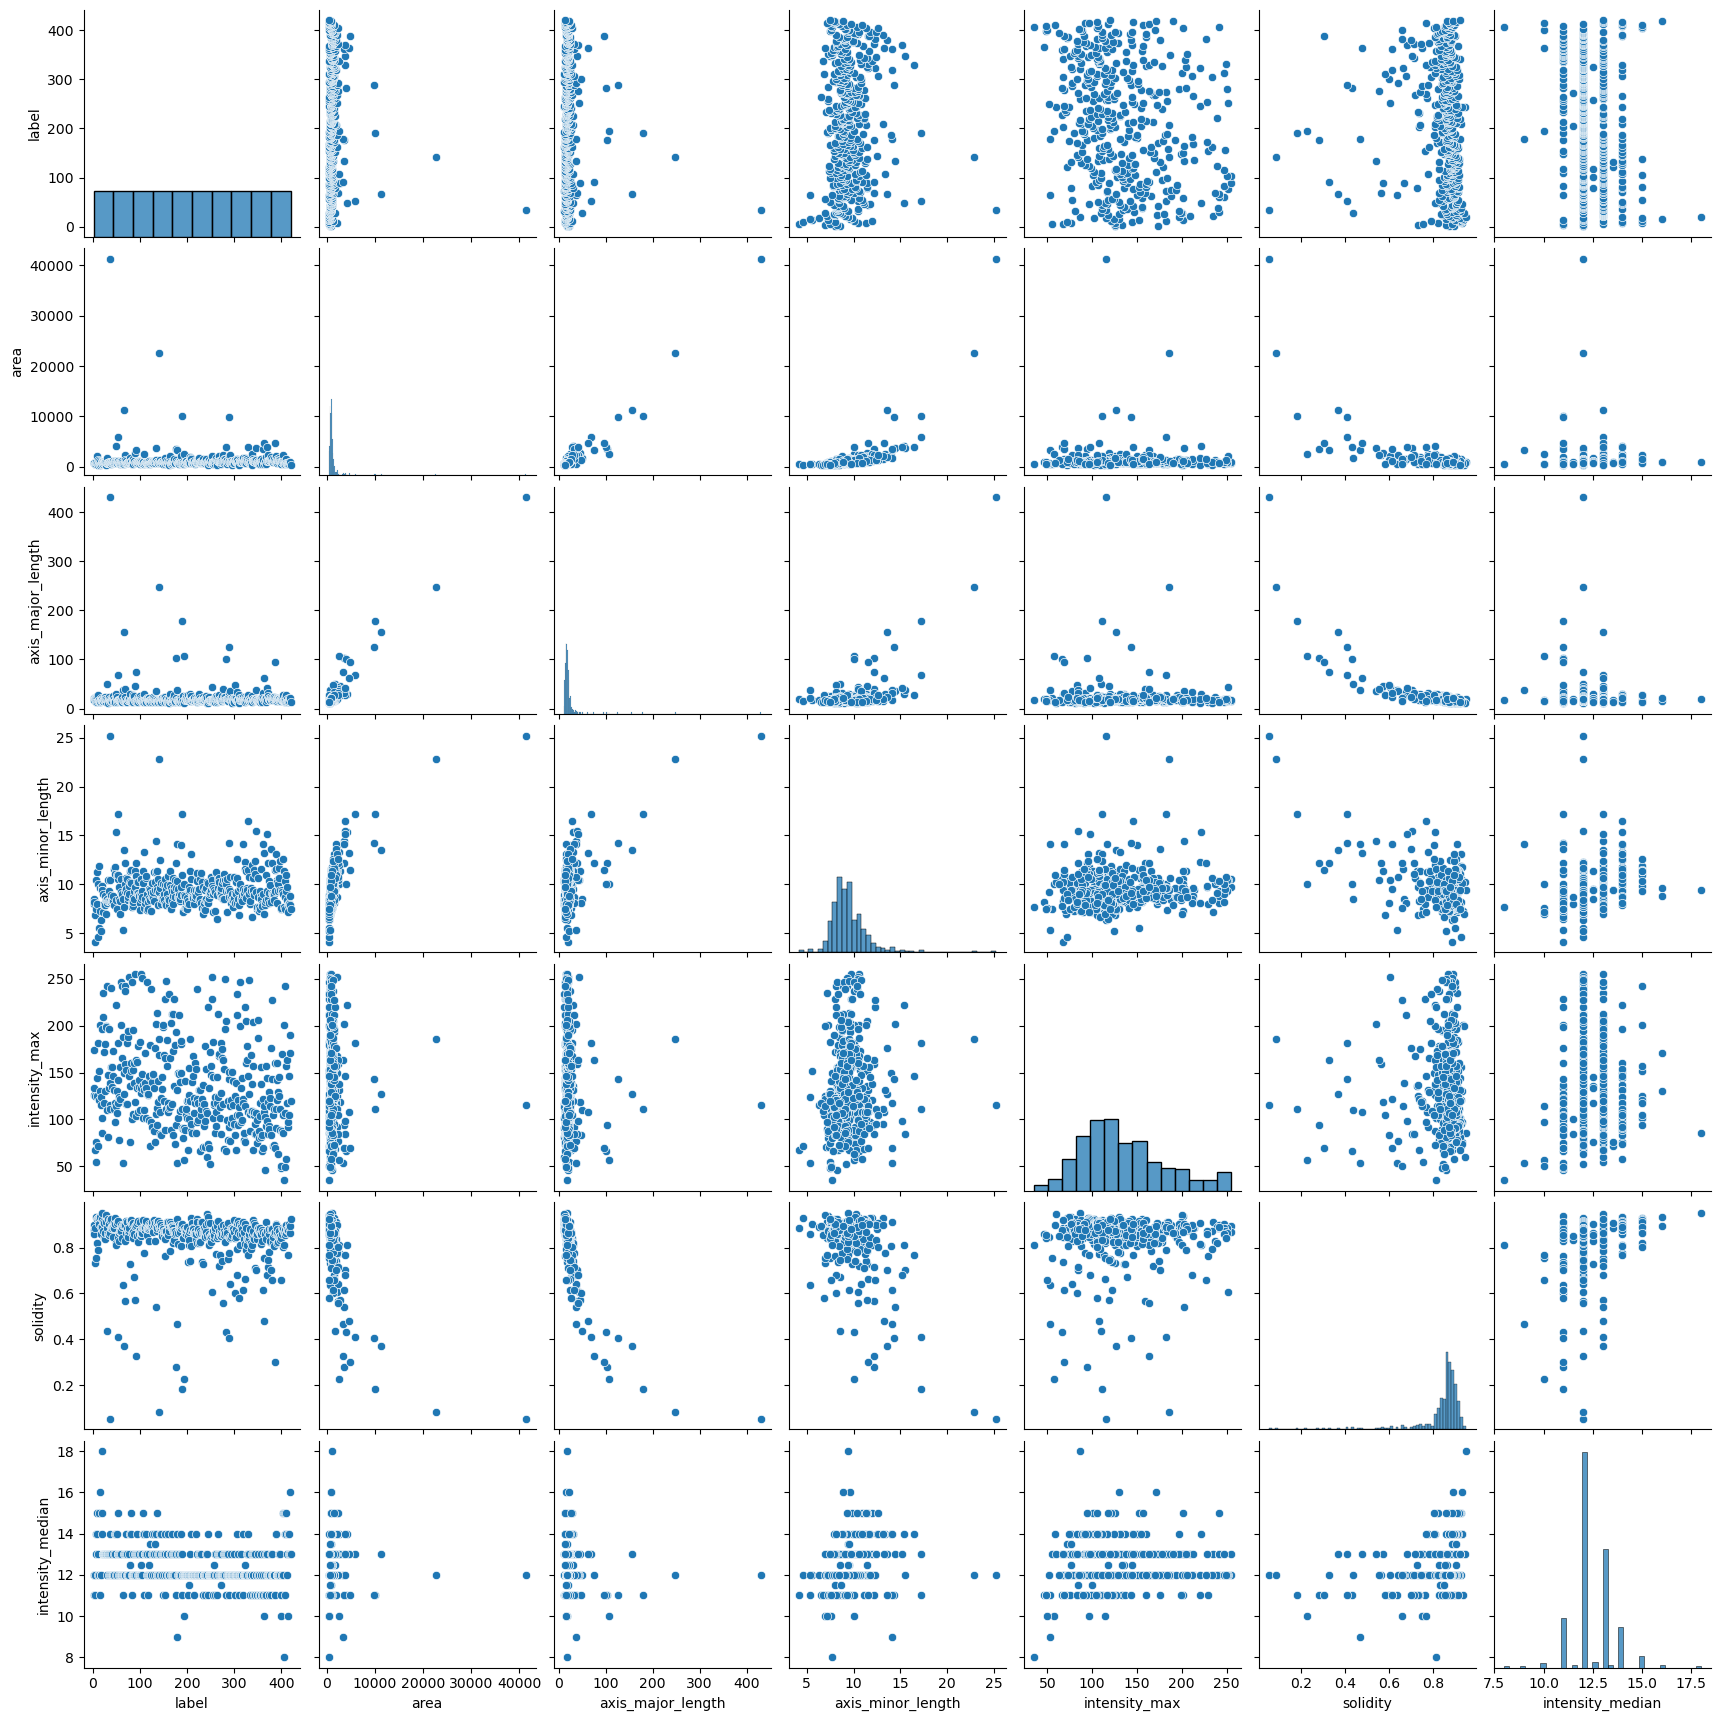

In [19]:
sns.pairplot(data)

# Tests

In [ ]:
complete_dataset.query("axis_major_length > 60")

In [ ]:
complete_dataset.loc[complete_dataset["area"].argmax()]